# 데이터 임포트 및 약간의 정리

In [ ]:
import pandas as pd
dat = pd.read_csv("C:\\Users\\jihun\\Downloads\\dat.csv")

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064176 entries, 0 to 8064175
Data columns (total 27 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   application_id                       int64  
 1   user_id                              int64  
 2   birth_year                           float64
 3   gender                               float64
 4   insert_time                          object 
 5   credit_score                         float64
 6   yearly_income                        float64
 7   income_type                          object 
 8   company_enter_month                  object 
 9   employment_type                      object 
 10  houseown_type                        object 
 11  desired_amount                       float64
 12  purpose                              object 
 13  personal_rehabilitation_yn           float64
 14  personal_rehabilitation_complete_yn  float64
 15  existing_loan_cnt               

In [ ]:
dat['purpose'] = dat['purpose'].replace({'SWITCHLOAN':'대환대출','LIVING':'생활비','BUYHOUSE':'주택구입',
                                        'BUYCAR':'자동차구입','BUSINESS':'사업자금','INVEST':'투자','HOUSEDEPOSIT':'전월세보증금',
                                        'ETC':'기타'}).astype('category')    # 같은 카테고리 이지만 은행사마다 기입하는 방식이 다른 듯. 하나로 통일해주었다.

In [ ]:
dat.groupby('purpose').size()

purpose
기타         222262
대환대출      2665585
사업자금       305480
생활비       4129236
자동차구입       41022
전월세보증금     270045
주택구입       273009
투자         157537
dtype: int64

# 데이터 분포 조정

전의 전처리 파일의 이상치 처리 항목에서 보았 듯이, 돈과 관련된 항목들의 분포는 매우 왼쪽으로 치우쳐 있어 추후 분석에 지장이 있을 수 있다고 판단하였다.
따라서, 분포를 최대한 정규분포에 가깝게 만들기로 결정.

C:\Users\com\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


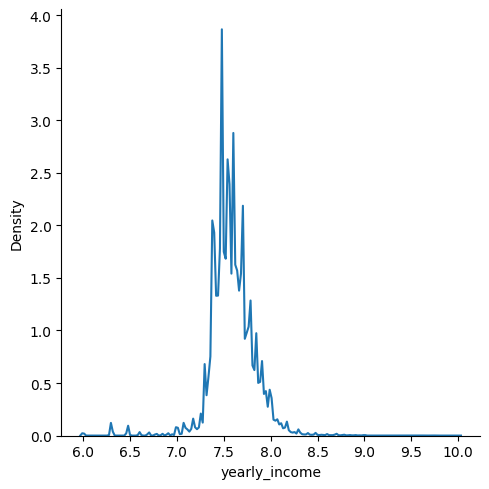

In [ ]:
import numpy as np
import seaborn as sns

dat['yearly_income']=np.log10(dat['yearly_income'])              # 기존 연간수입에 로그를 취하였다.

sns.displot(dat['yearly_income'],kind='kde')                 # 기존 분포보다 훨씬 정규분포에 가까워졌다.

C:\Users\com\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


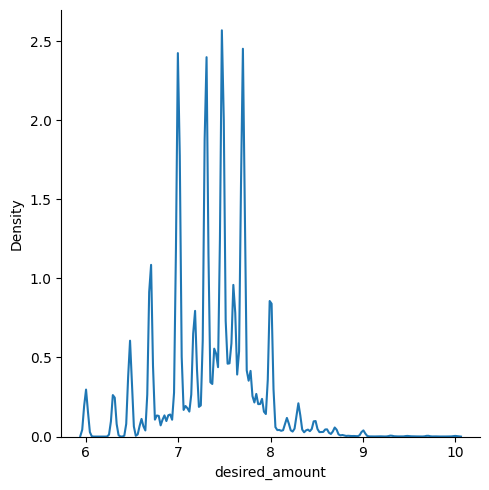

In [ ]:
dat['desired_amount']=np.log10(dat['desired_amount'])               # 연간수입과 마찬가지로 로그를 취해주었다.

sns.displot(dat['desired_amount'],kind='kde')         # 연관수입과 달리, 대출하고자 하는 금액은 로그를 취해도 정규분포에 가까워 지지는 않았다.
                                 # 아무래도 연간수입은 어느정도 범위에 대다수가 있는 반면에, 대출하고자 하는 금액은 연봉이 비슷해도 사람마다 매우 다르기 때문인 것 같다.

C:\Users\com\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


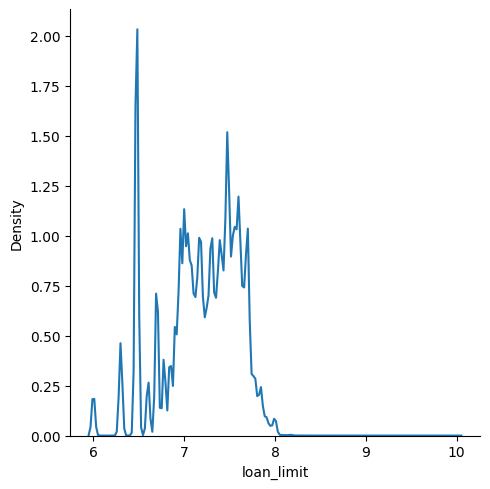

In [ ]:
dat['loan_limit']=np.log10(dat['loan_limit'])

sns.displot(dat['loan_limit'],kind='kde')

C:\Users\com\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


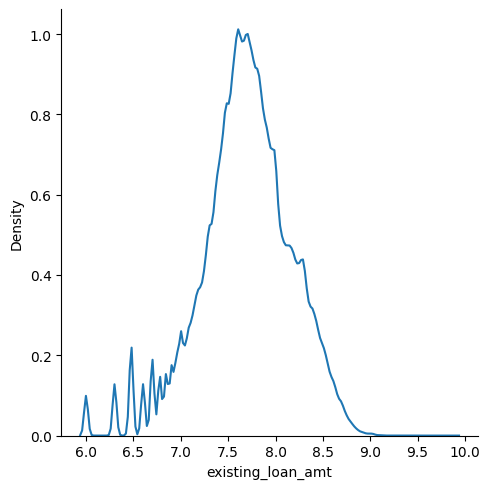

In [ ]:
#dat['existing_loan_amt']=np.log10(dat['existing_loan_amt'])                    # 기대출 금액에 로그를 취해주었다.

#sns.displot(dat['existing_loan_amt'],kind='kde')

# 데이터 이상치 제거

분포를 바꾸었음에도 이상치로 남아있는 항목들은, 이전에 정했던 것처럼 대체하기로 결정하였다.

In [ ]:
q3=dat['yearly_income'].quantile(0.75)
q1=dat['yearly_income'].quantile(0.25)
iqr=q3-q1
dat=dat[(dat['yearly_income']<q3+1.5*iqr)&(dat['yearly_income']>q1-1.5*iqr)]

In [ ]:
q3=dat['desired_amount'].quantile(0.75)
q1=dat['desired_amount'].quantile(0.25)
iqr=q3-q1
dat=dat[(dat['desired_amount']<q3+1.5*iqr)&(dat['desired_amount']>q1-1.5*iqr)]

C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='desired_amount'>

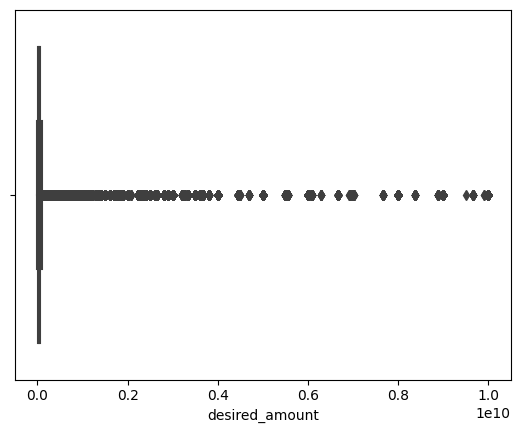

In [ ]:
sns.boxplot(dat['desired_amount'])

In [ ]:
q3=dat['desired_amount'].quantile(0.75)
q1=dat['desired_amount'].quantile(0.25)
iqr=q3-q1
dat=dat[(dat['desired_amount']<q3+1.5*iqr)&(dat['desired_amount']>q1-1.5*iqr)]

C:\Users\jihun\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='desired_amount'>

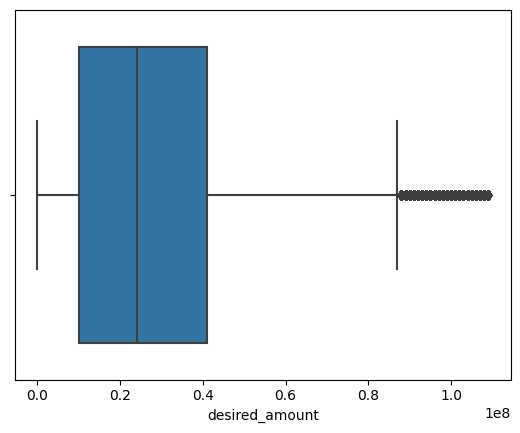

In [ ]:
sns.boxplot(dat['desired_amount'])

In [ ]:
q3=dat['loan_limit'].quantile(0.75)
q1=dat['loan_limit'].quantile(0.25)
iqr=q3-q1
dat=dat[(dat['loan_limit']<q3+1.5*iqr)&(dat['loan_limit']>q1-1.5*iqr)]

In [ ]:
dat.describe()

,application_id,user_id,birth_year,gender,credit_score,yearly_income,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
count,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06,7.550237e+06
mean,1.082988e+06,4.397916e+05,1.982850e+03,7.060022e-01,7.452059e+02,7.587770e+00,7.346470e+00,5.571878e-03,6.765351e-04,3.377199e+00,-inf,3.290693e+01,1.466479e+02,7.195387e+00,1.284122e+01,5.325462e-02,1.103867e+00,3.469886e+01,4.053935e+00,2.517016e+00
std,6.259618e+05,2.538586e+05,9.417498e+00,4.555910e-01,1.261823e+02,1.702313e-01,4.589992e-01,7.443677e-02,2.600149e-02,3.230053e+00,NaN,1.711229e+01,7.775210e+01,3.938852e-01,3.855667e+00,2.245408e-01,6.171288e-01,9.966239e+00,5.188020e+00,7.819103e-01
min,1.000000e+00,1.100000e+01,1.933000e+03,0.000000e+00,1.000000e+02,7.146128e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-inf,1.000000e+00,1.000000e+00,6.301030e+00,1.500000e+00,0.000000e+00,0.000000e+00,1.000000e+01,2.739726e-03,0.000000e+00
25%,5.413300e+05,2.208320e+05,1.977000e+03,0.000000e+00,6.400000e+02,7.477121e+00,7.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.146128e+00,2.000000e+01,7.100000e+01,6.954243e+00,9.800000e+00,0.000000e+00,1.000000e+00,3.000000e+01,7.643836e-01,2.000000e+00
50%,1.082099e+06,4.397340e+05,1.984000e+03,1.000000e+00,7.200000e+02,7.556303e+00,7.397940e+00,0.000000e+00,0.000000e+00,3.000000e+00,7.602060e+00,3.400000e+01,1.500000e+02,7.255273e+00,1.330000e+01,0.000000e+00,1.000000e+00,3.000000e+01,2.065753e+00,3.000000e+00
75%,1.624734e+06,6.611270e+05,1.990000e+03,1.000000e+00,8.500000e+02,7.698970e+00,7.698970e+00,0.000000e+00,0.000000e+00,5.000000e+00,7.913814e+00,4.700000e+01,2.170000e+02,7.505150e+00,1.580000e+01,0.000000e+00,1.000000e+00,4.000000e+01,5.126027e+00,3.000000e+00
max,2.167826e+06,8.796960e+05,2.003000e+03,1.000000e+00,1.000000e+03,8.029384e+00,8.745075e+00,1.000000e+00,1.000000e+00,1.780000e+02,9.875756e+00,6.400000e+01,2.700000e+02,8.330414e+00,2.000000e+01,1.000000e+00,2.000000e+00,8.000000e+01,5.208767e+01,3.000000e+00


In [ ]:
q3=dat['existing_loan_amt'].quantile(0.75)
q1=dat['existing_loan_amt'].quantile(0.25)
iqr=q3-q1
dat=dat[(dat['existing_loan_amt']<q3+1.5*iqr)&(dat['existing_loan_amt']>q1-1.5*iqr)]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,7.698970,EARNEDINCOME2,2021-10-01,기타,...,2022-04-20 01:23:10,42,216,6.477121,14.5,0.0,1,40,0.550685,2
1,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,7.698970,EARNEDINCOME2,2021-10-01,기타,...,2022-04-20 01:23:09,13,123,6.000000,19.9,0.0,1,40,0.550685,2
2,256442,614734,1976.0,1.0,2022-04-20 16:13:06,540.0,7.602060,EARNEDINCOME,2019-08-01,정규직,...,2022-04-20 16:13:09,2,126,7.477121,17.9,1.0,1,40,2.720548,3
3,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,7.556303,EARNEDINCOME,2021-05-01,정규직,...,2022-04-24 16:37:59,19,127,6.954243,9.4,0.0,1,20,0.980822,2
4,1031596,31668,2000.0,1.0,2022-04-24 16:37:52,710.0,7.556303,EARNEDINCOME,2021-05-01,정규직,...,2022-04-24 16:37:53,17,19,7.000000,13.8,0.0,1,20,0.980822,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6898068,1085121,650057,1995.0,1.0,2022-05-27 19:48:24,790.0,7.602060,EARNEDINCOME,2022-05-01,정규직,...,2022-05-27 19:48:24,59,150,7.361728,16.4,0.0,1,20,0.071233,0
6898069,1085121,650057,1995.0,1.0,2022-05-27 19:48:24,790.0,7.602060,EARNEDINCOME,2022-05-01,정규직,...,2022-05-27 19:48:26,60,183,7.230449,6.3,1.0,1,20,0.071233,0
6898070,1085121,650057,1995.0,1.0,2022-05-27 19:48:24,790.0,7.602060,EARNEDINCOME,2022-05-01,정규직,...,2022-05-27 19:48:25,29,265,7.556303,9.0,0.0,1,20,0.071233,0
6898071,1085121,650057,1995.0,1.0,2022-05-27 19:48:24,790.0,7.602060,EARNEDINCOME,2022-05-01,정규직,...,2022-05-27 19:48:26,25,169,7.477121,17.9,0.0,1,20,0.071233,0


## 기대출 금액 항목에 관한 조정 및 새로운 컬럼 생성

In [ ]:
dat['existing_loan_amt']   # 기대출 금액의 경우, 대출을 아예 하지 않은 사람의 경우 0원이였으므로, 로그를 취했을때 값이 -inf가 되는 문제가 생긴다.

0          7.880814
2          7.806180
3          7.447158
4          7.447158
5          7.447158
             ...   
8064171        -inf
8064172        -inf
8064173        -inf
8064174        -inf
8064175        -inf
Name: existing_loan_amt, Length: 7550237, dtype: float64

In [ ]:
# 논의 결과, 기대출 금액 자체보다는, 평균 기대출 금액이 더 유의미 할 것 같다는 의견을 반영하기로 하였다.
# 따라서, 기대출 금액에 기대출 수를 나누어 평균 기대출 금액 컬럼을 생성하였다.

In [ ]:
dat['mean_exloan']=0         # Default는 0. 기대출이 아예 없는 사람은 기대출 평균 금액도 0이기 때문.
dat.loc[(dat['existing_loan_amt']>0)&(dat['existing_loan_cnt']>0),'mean_exloan'] = dat['existing_loan_amt']/dat['existing_loan_cnt']

In [ ]:
dat['mean_exloan']

0          2.533333e+07
1          2.533333e+07
2          3.200000e+07
3          1.400000e+07
4          1.400000e+07
               ...     
8064171    0.000000e+00
8064172    0.000000e+00
8064173    0.000000e+00
8064174    0.000000e+00
8064175    0.000000e+00
Name: mean_exloan, Length: 8064176, dtype: float64

# EDA

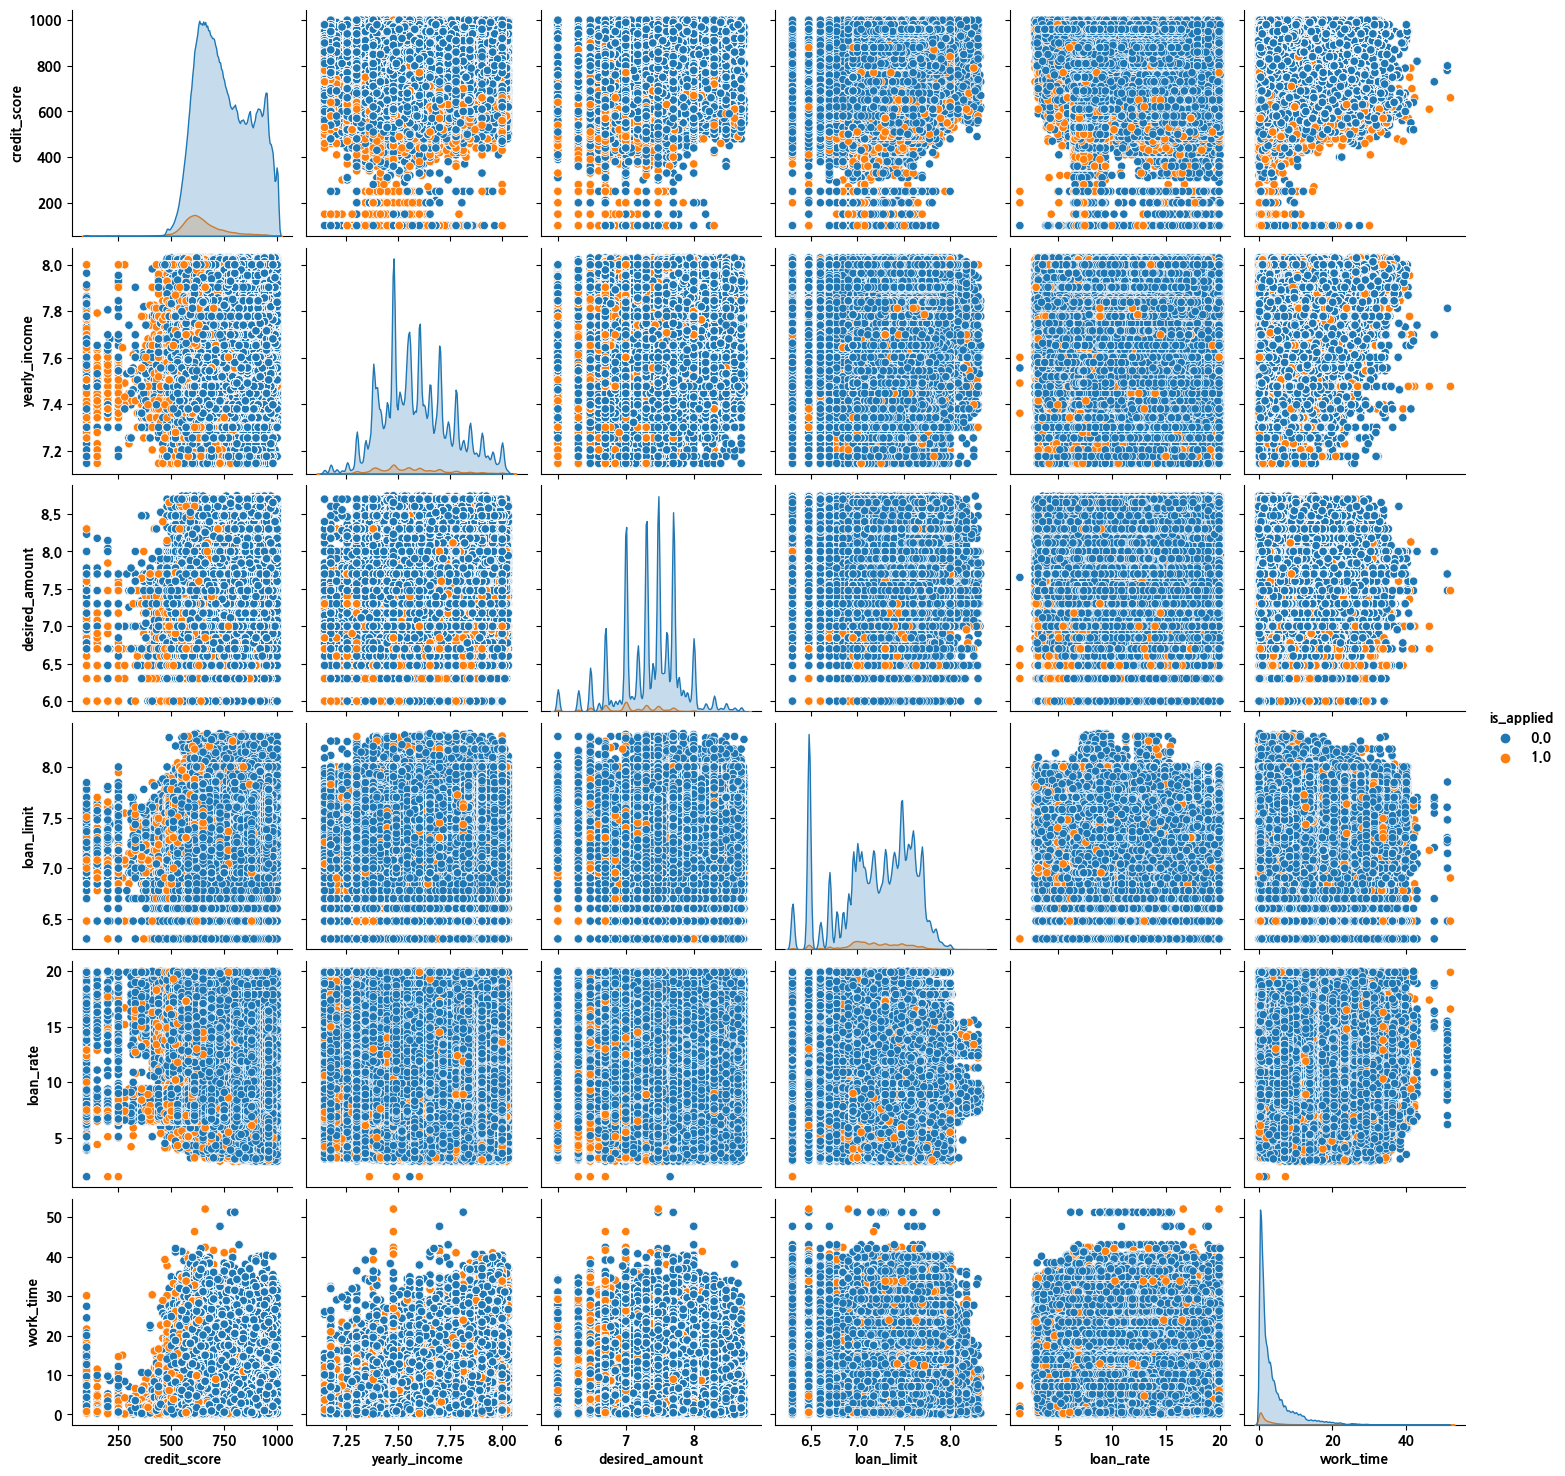

In [ ]:
import seaborn as sns
sns.pairplot(data=dat,hue='is_applied')      # 타겟 데이터에 따라 색깔을 분류한 뒤 그린 그래프. 데이터 수가 굉장히 많아서 정돈이 안되어 있는 느낌이지만, 
                                            # 어느 정도의 구분되는 영역을 확인 가능하다.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그래프 그릴 때 한글 폰트 깨짐 방지

## 타겟 데이터에 따른 명목형 변수 분포

<AxesSubplot: xlabel='purpose'>

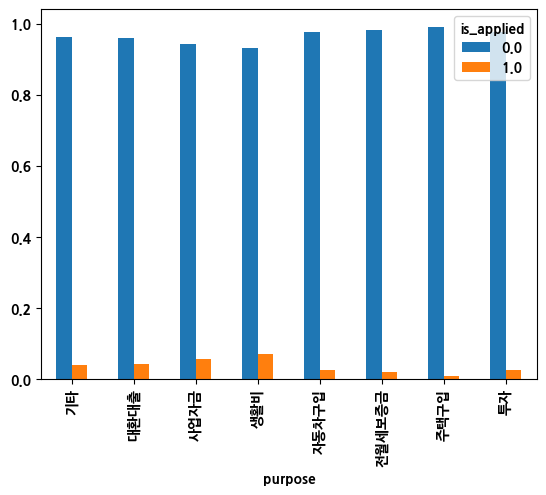

In [ ]:
pd.crosstab(dat['purpose'],dat['is_applied'],normalize='index').plot(kind='bar')                  

In [ ]:
dat.groupby('purpose').size()

purpose
기타         222262
대환대출      2665585
사업자금       305480
생활비       4129236
자동차구입       41022
전월세보증금     270045
주택구입       273009
투자         157537
dtype: int64

<AxesSubplot:xlabel='purpose'>

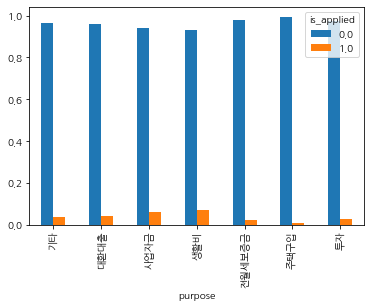

In [ ]:
pd.crosstab(dat['purpose'],dat['is_applied'],normalize='index').plot(kind='bar')

<AxesSubplot: xlabel='age'>

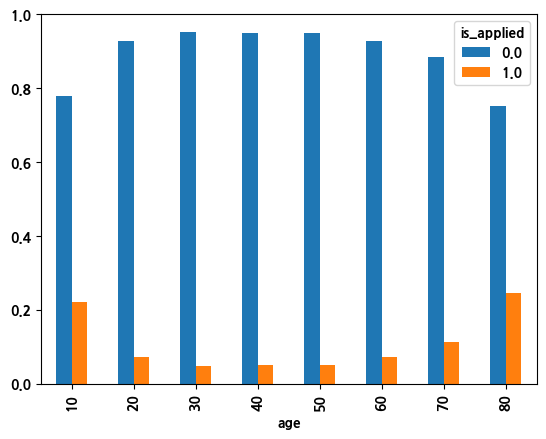

In [ ]:
pd.crosstab(dat['age'],dat['is_applied'],normalize='index').plot(kind='bar')        # 불균형이 심해보이지만, 함정이 있다.

In [ ]:
dat.groupby('age').size()              # 10대와 70,80대의 데이터 수가 매우 적다. 

age
10       1139
20    1300021
30    3033320
40    2462388
50    1066744
60     186381
70      13811
80        372
dtype: int64

In [ ]:
dat.loc[dat['age']>=60,'age']=60           # 70,80대를 60대와 합쳐, 60대 이상으로 변경.

In [ ]:
dat.loc[dat['age']<=20,'age']=20           # 10대,20대를 합쳐, 20대 이하로 변경

In [ ]:
dat.groupby('age').size()

age
20    1301160
30    3033320
40    2462388
50    1066744
60     200564
dtype: int64

<AxesSubplot:xlabel='age'>

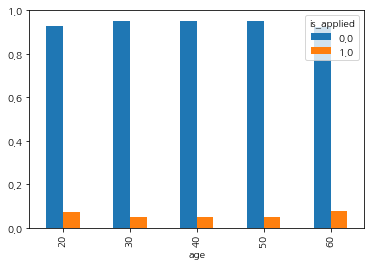

In [ ]:
pd.crosstab(dat['age'],dat['is_applied'],normalize='index').plot(kind='bar')   # 이제는 타겟별로 차이가 심하지 않아 보인다.

In [ ]:
dat[dat['age']==10].groupby('purpose').size()

purpose
기타         43
대환대출       43
사업자금       32
생활비       733
자동차구입       9
전월세보증금     48
주택구입        8
투자         64
dtype: int64

<AxesSubplot: xlabel='houseown_type'>

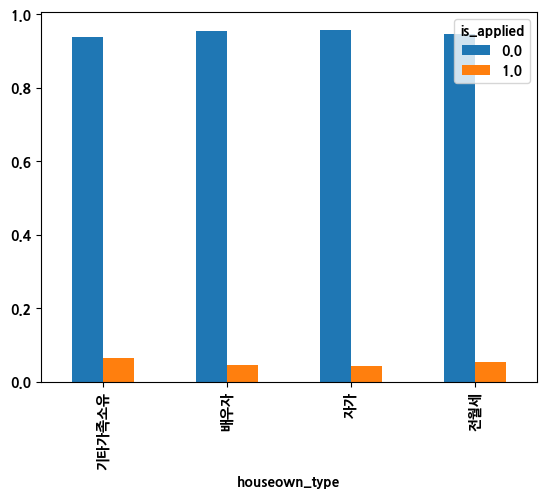

In [ ]:
pd.crosstab(dat['houseown_type'],dat['is_applied'],normalize='index').plot(kind='bar')

<AxesSubplot: xlabel='employment_type'>

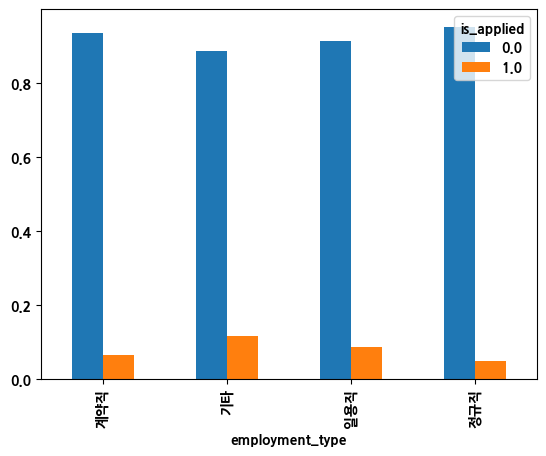

In [ ]:
pd.crosstab(dat['employment_type'],dat['is_applied'],normalize='index').plot(kind='bar')

<AxesSubplot: xlabel='income_type'>

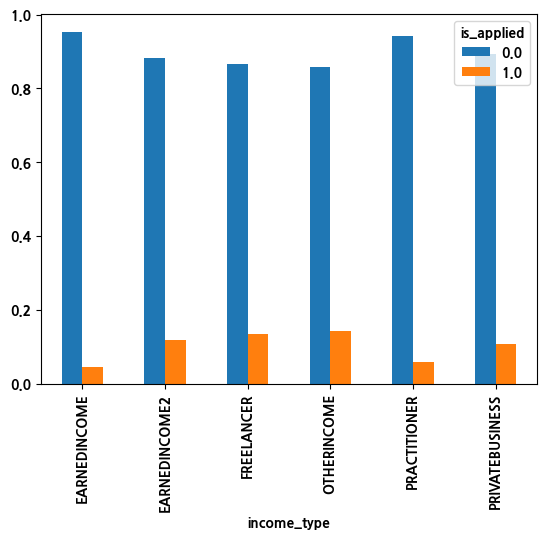

In [ ]:
pd.crosstab(dat['income_type'],dat['is_applied'],normalize='index').plot(kind='bar')

<AxesSubplot: xlabel='bank_id'>

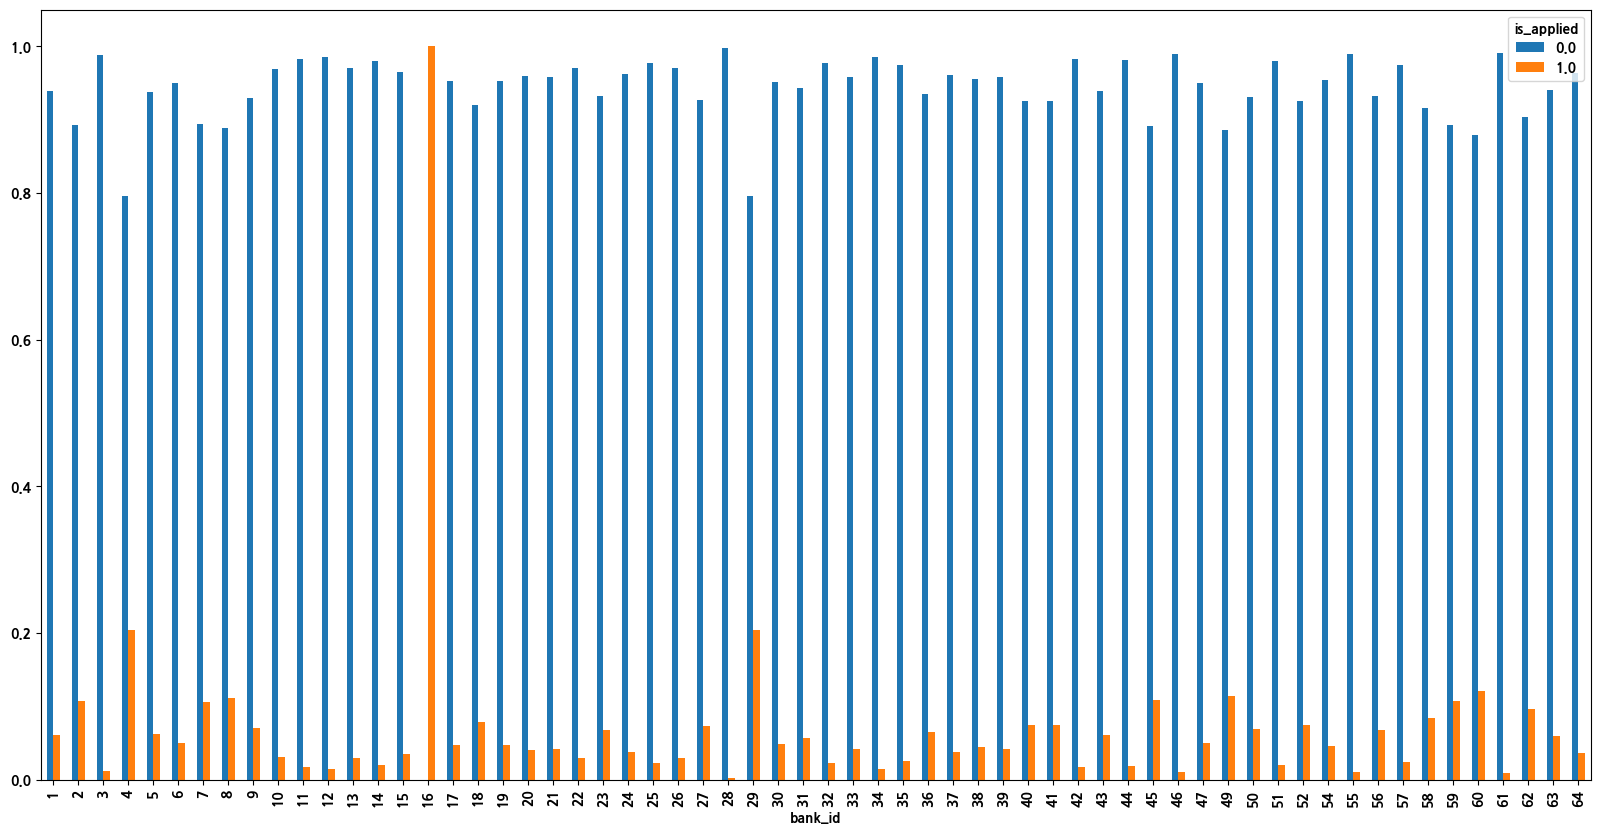

In [ ]:
plt.rcParams['figure.figsize']=[20,10]
pd.crosstab(dat['bank_id'],dat['is_applied'],normalize='index').plot(kind='bar')

<AxesSubplot: xlabel='bank_id', ylabel='loan_rate'>

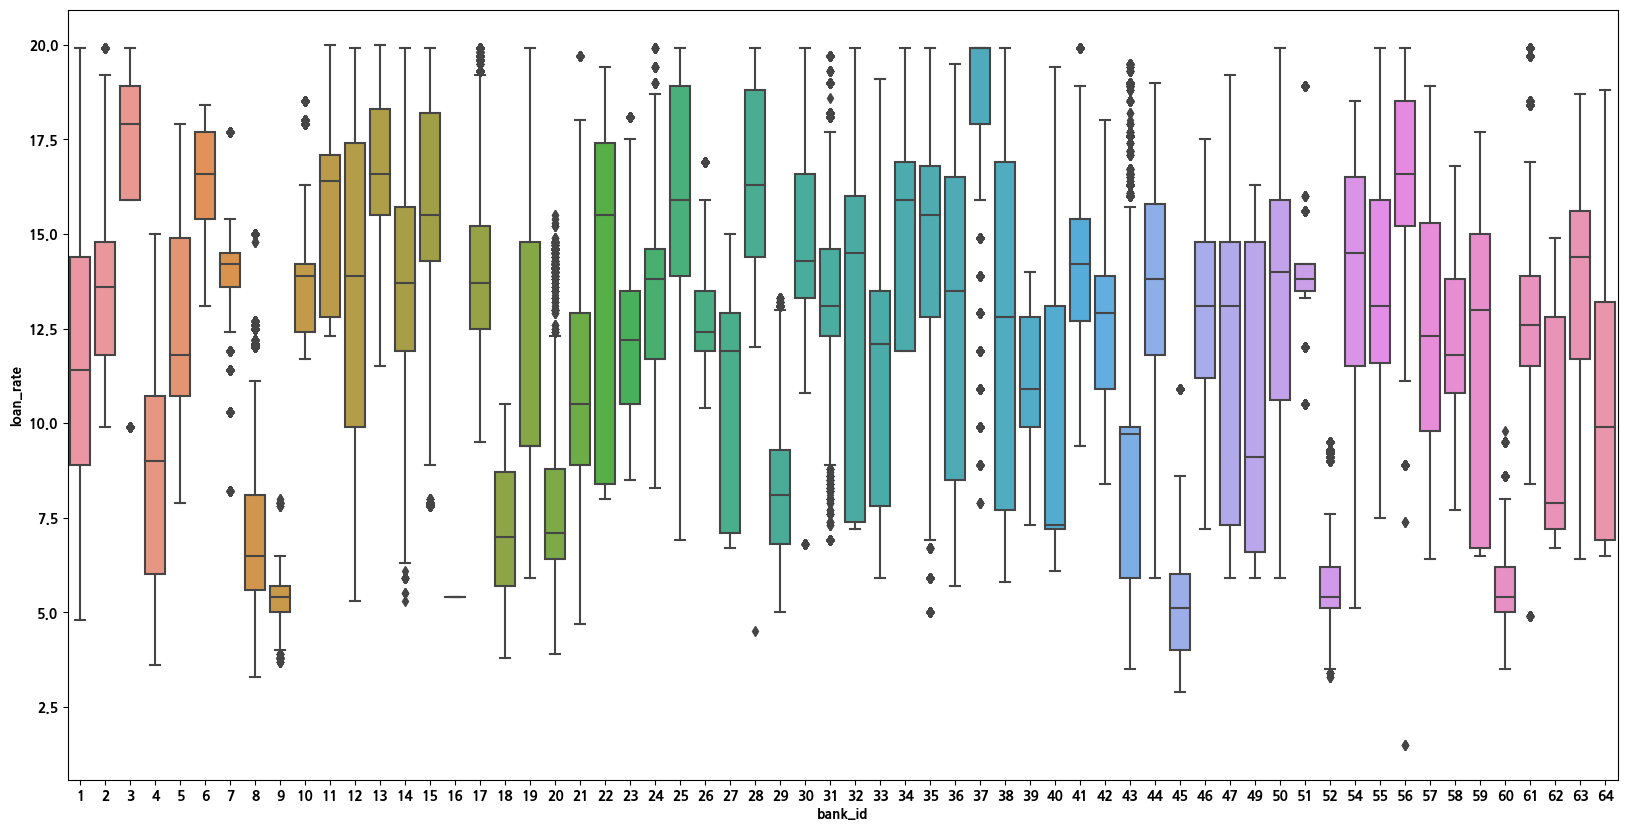

In [ ]:
sns.boxplot(x='bank_id',y='loan_rate',data=dat)

<AxesSubplot: xlabel='bank_id', ylabel='loan_limit'>

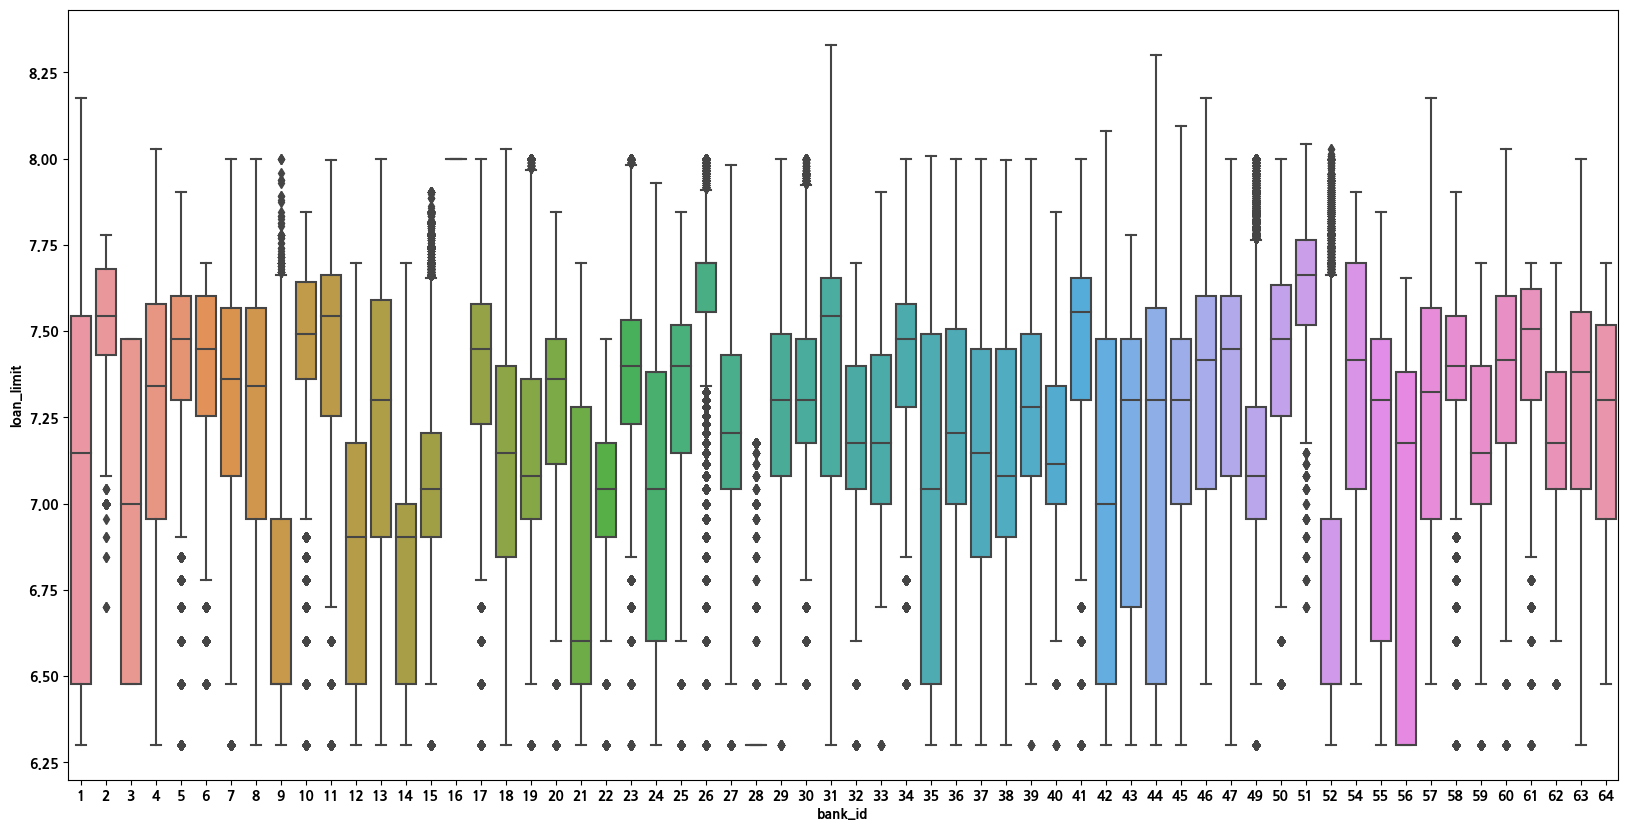

In [ ]:
sns.boxplot(x='bank_id',y='loan_limit',data=dat)

## 연속형 변수간의 상관관계

In [ ]:
corr=dat.corr()

<AxesSubplot:>

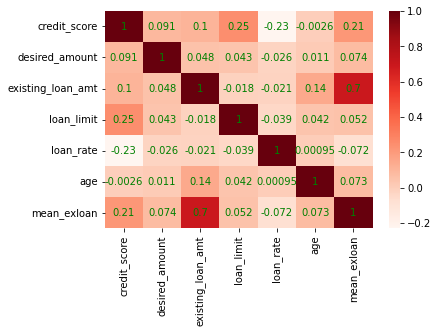

In [ ]:
sns.heatmap(corr,annot=True,annot_kws=dict(color='g'),cmap='Reds')

In [ ]:
# 앞에서 생성하였던 평균 기대출 금액과 전체 기대출 금액간의 강한 상관관계를 제외하면, 
# 변수간의 상관관계는 크게 존재하지 않는걸로 보인다.
# 추후에 불필요한 컬럼을 제거할때, 전체 기대출 금액을 제거 할 예정.

## 범주형 변수간의 상관관계

In [ ]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in dat.columns :
  data_encoded[i]=label.fit_transform(dat[i])           # 범주형 변수들의 라벨 인코딩을 위한 함수

In [ ]:
data_encoded

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,499930,171658,45,1,281934,45,50,1,480,1,...,1073629,41,125,3,117,0,1,2,200,2
1,499930,171658,45,1,281934,45,50,1,480,1,...,1073628,12,69,1,171,0,1,2,200,2
2,65914,126145,42,1,286467,32,40,0,454,3,...,1090643,1,71,30,151,1,1,2,992,3
3,265385,6482,66,1,307326,49,36,0,475,3,...,1171024,18,72,9,66,0,1,0,357,2
4,265385,6482,66,1,307326,49,36,0,475,3,...,1171019,16,7,10,110,0,1,0,357,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064171,155552,52721,51,0,181507,40,24,0,430,3,...,698039,6,127,7,117,0,0,1,1705,3
8064172,155552,52721,51,0,181507,40,24,0,430,3,...,698039,20,118,3,102,1,0,1,1705,3
8064173,155552,52721,51,0,181507,40,24,0,430,3,...,698039,53,1,6,131,0,0,1,1705,3
8064174,46086,177722,33,1,171106,28,36,0,471,3,...,656024,47,19,8,133,0,0,3,454,3


In [ ]:
dat_cat=data_encoded.drop(columns=['application_id','user_id','birth_year','insert_time','company_enter_month','personal_rehabilitation_yn',
                 'product_id','loanapply_insert_time','existing_loan_amt','credit_score','yearly_income','desired_amount','loan_limit','loan_rate','work_time'])

In [ ]:
dat_cat             # 범주형 변수들만을 추출한 데이터프레임, 라벨 인코딩이 되어있는 것을 확인.

,gender,income_type,employment_type,houseown_type,purpose,personal_rehabilitation_complete_yn,existing_loan_cnt,bank_id,is_applied,exloan,age,work_rank
0,1,1,1,3,1,0,3,41,0,1,2,2
1,1,1,1,3,1,0,3,12,0,1,2,2
2,1,0,3,3,3,0,2,1,1,1,2,3
3,1,0,3,0,3,0,2,18,0,1,0,2
4,1,0,3,0,3,0,2,16,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8064171,0,0,3,3,3,0,0,6,0,0,1,3
8064172,0,0,3,3,3,0,0,20,1,0,1,3
8064173,0,0,3,3,3,0,0,53,0,0,1,3
8064174,1,0,3,3,3,0,0,47,0,0,3,3


In [ ]:
import scipy.stats as stats
import numpy as np

#Chi-squared test statistic, sample size, and minimum of rows and columns
X2 = stats.chi2_contingency(dat, correction=False)[0]
n = np.sum(data)
minDim = min(data.shape)-1

#calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)

#display Cramer's V
print(V)                                                 # 범주형 변수간의 상관계수(Cramer's V)를 구하기 위한 함수

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np



def cramer_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None)) # Crosstab building
    chi2 = stats.chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    phi2 = chi2 / n
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)*2)/(n-1)
    kcorr = k - ((k-1)*2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


In [ ]:
rows= []

for var1 in dat_cat:
  col = []
  for var2 in dat_cat :
    cramers =cramers_V(dat_cat[var1], dat_cat[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = dat_cat.columns, index =dat_cat.columns)




C:\Users\jihun\AppData\Local\Temp\ipykernel_4908\1050393467.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


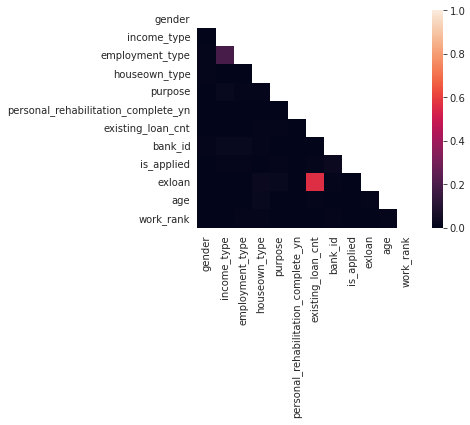

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()


In [ ]:
# 범주형 변수간의 상관계수를 나타낸 그래프이다. 
# preprocessing 항목에서 정의했던 exloan과 기대출 회수간의 상관관계를 제외하고는 전혀 상관관계가 없다.

# 불필요한 컬럼 제거

In [ ]:
dat_d=dat.drop(columns=['application_id','user_id','birth_year','insert_time','company_enter_month','personal_rehabilitation_yn',
                 'product_id','loanapply_insert_time','gender','existing_loan_cnt','existing_loan_amt','bank_id','personal_rehabilitation_complete_yn'])

# 불필요하다고 판단되는 컬럼 제거.
# existing_loan_cnt, existing_loan_amt는 exloan에 반영이 되어 있으므로 삭제

In [ ]:
dat_d

,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,loan_limit,loan_rate,is_applied,exloan,age,work_time,work_rank
0,670.0,50000000.0,EARNEDINCOME2,기타,전월세,25000000.0,대환대출,3000000.0,14.5,0.0,1,40,0.550685,2
1,670.0,50000000.0,EARNEDINCOME2,기타,전월세,25000000.0,대환대출,1000000.0,19.9,0.0,1,40,0.550685,2
2,540.0,40000000.0,EARNEDINCOME,정규직,전월세,15000000.0,생활비,30000000.0,17.9,1.0,1,40,2.720548,3
3,710.0,36000000.0,EARNEDINCOME,정규직,기타가족소유,13000000.0,생활비,9000000.0,9.4,0.0,1,20,0.980822,2
4,710.0,36000000.0,EARNEDINCOME,정규직,기타가족소유,13000000.0,생활비,10000000.0,13.8,0.0,1,20,0.980822,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064171,620.0,24000000.0,EARNEDINCOME,정규직,전월세,5000000.0,생활비,7000000.0,14.5,0.0,0,30,4.673973,3
8064172,620.0,24000000.0,EARNEDINCOME,정규직,전월세,5000000.0,생활비,3000000.0,13.0,1.0,0,30,4.673973,3
8064173,620.0,24000000.0,EARNEDINCOME,정규직,전월세,5000000.0,생활비,6000000.0,15.9,0.0,0,30,4.673973,3
8064174,500.0,36000000.0,EARNEDINCOME,정규직,전월세,30000000.0,생활비,8000000.0,16.1,0.0,0,50,1.246575,3


# 핀다앱 사용을 통해 불필요한 컬럼 제거 (중요!)

In [ ]:
dat_d=dat.drop(columns=['income_type','employment_type','houseown_type','purpose','yearly_income'])


논의 끝에 문제가 많던 여러 변수들을 전부 제거해 주기로 결정하였다. 이유로는, 첫번째로 타겟과 상관계수가 전부 0에 가깝게 나왔기 때문이였다. 물론 상관계수가 0이라고 해서 전혀 관련이 없다는 것은 아니지만, 2번째 이유가 너무 크기에 삭제를 결정하였다.

2번째 이유는, 핀다앱을 직접 사용해 보면서 깨달은 점이다.
핀다앱을 사용하여 대출을 신청할 때의 가장 큰 문제점은, 처음에 자신의 신상 정보를 입력하는데 전혀 인증 과정이 없다는 뜻이다.
연간 수입이나 집 소유 여부 등등 대출에 있어서 매우 중요한 항목인데, 처음에 입력할때에는 전혀 인증 절차가 없어 유저가 사실과 다른 데이터를 입력하여도 데이터에 그대로 저장이 되어버린다는 문제점이 있다.

일례로, 필자는 아직 학생이고 연간 수입도 없지만, 핀다앱을 이용하여 연봉 100억원인 회사 사장으로 신청을 하였고, 대출 절차로 넘어가졌다.
물론, 추후에 신용정보를 조사하기 위하여 개인 인증을 하고, 이를 통해 은행사에서 나의 신용과 수입에 맞는 대출 조건들을 주겠지만, 대회를 통해 받은 데이터에는 필자가 아까 입력한 데이터들이 입력된다는 것이다.
이 때문에 EDA 과정에서도 여럿 이상한 데이터들이 발견되었다.
이를테면, 연간 수입이 100억인데 신용 점수가 400점대인 사람 등.


이러한 이유들로 인하여, 확실한 컬럼들(신용점수, 나이 등)을 제외하고는 전부 제거해주기로 결정하였다.

In [ ]:
import os
os.chdir("C:\\Users\\com\\Downloads")

dat_d.to_csv("dat_d.csv",index=False)

# 전처리 및 불필요한 컬럼까지 제거한 데이터 저장.